In [3]:
import numpy as np
import pandas as pd
import os, glob, sys
import matplotlib.pyplot as plt

In [4]:
# iters = [0,1,2,3]
iters = [0]
# b=97
# b=256
b=514

# new mo-asmo

In [5]:

df_new = pd.DataFrame()
for i in iters:
    f=f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/MOASMO_exps_widerange_allsample/level1_{b}_MOASMOcalib/ctsm_outputs/iter{i}_all_metric.csv'
    df = pd.read_csv(f)
    df['iter']=i
    df_new = pd.concat([df_new, df])
    
# df_new = pd.DataFrame()
# for i in iters:
#     f=f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/MOASMO_exps/level1_{b}_MOASMOcalib/ctsm_outputs/iter{i}_all_metric.csv'
#     df = pd.read_csv(f)
#     df['iter']=i
#     df_new = pd.concat([df_new, df])


df_old = pd.DataFrame()
for i in iters:
    f=f'/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/Calib_HH_MOASMO/level1_{b}_MOASMOcalib/ctsm_outputs/iter{i}_all_metric.csv'
    df = pd.read_csv(f)
    df['iter']=i
    df_old = pd.concat([df_old, df])

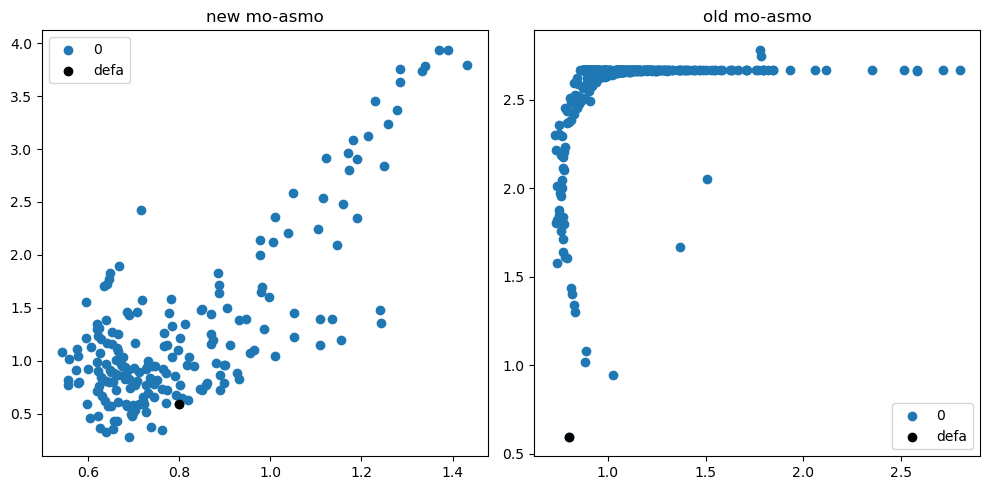

In [6]:

fig = plt.figure(figsize=[10,5])

fig.add_subplot(1,2,1)
data = df_new.values
for i in iters:
    ind = data[:,2]==i
    plt.scatter(data[ind,0], data[ind,1], label=i)
plt.scatter(data[0,0],data[0,1],color='k',label='defa')
plt.title('new mo-asmo')
plt.legend()

fig.add_subplot(1,2,2)
data = df_old.values
for i in iters:
    ind = data[:,2]==i
    plt.scatter(data[ind,0], data[ind,1], label=i)
plt.scatter(data[0,0],data[0,1],color='k',label='defa')
plt.title('old mo-asmo')
plt.legend()

plt.tight_layout()
plt.show()

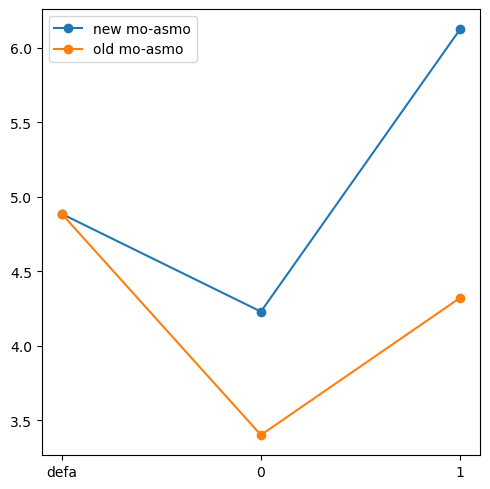

In [95]:
fig = plt.figure(figsize=[5,5])

data = df_new.values
metmean = np.nanmean(data[:,:2],axis=1)
metmean2 = []
for i in iters:
    ind = data[:,2]==i
    if i == 0:
        metmean2.append(metmean[0])
    metmean2.append(np.nanmin(metmean[ind]))

metmean2 = np.array(metmean2)
plt.plot(['defa']+iters, metmean2, '-o', label='new mo-asmo')


data = df_old.values
metmean = np.nanmean(data[:,:2],axis=1)
metmean2 = []
for i in iters:
    ind = data[:,2]==i
    if i == 0:
        metmean2.append(metmean[0])
    metmean2.append(np.nanmin(metmean[ind]))

metmean2 = np.array(metmean2)
plt.plot(['defa']+iters, metmean2, '-o', label='old mo-asmo')

plt.legend()

plt.tight_layout()
plt.show()
